In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### **1. Đọc Data**

In [2]:
data_stroke = pd.read_csv("C:/Users/Admin/Desktop/DA1/data/data_stroke.csv")
data_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [3]:
data_stroke.rename(columns = {'Residence_type':'residence_type'}, inplace = True) 

In [4]:
#Hiển thị 5 dòng đầu tiên
data_stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
data_stroke.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [6]:
data_stroke.sample(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
617,24183,Female,55.0,0,0,Yes,Govt_job,Rural,75.56,29.4,smokes,0
3624,12117,Male,8.0,0,0,No,children,Urban,84.68,14.5,Unknown,0
955,39250,Male,31.0,0,0,Yes,Private,Urban,85.16,30.1,smokes,0
4281,53105,Female,29.0,0,0,Yes,Private,Urban,63.90,45.4,smokes,0
1932,3390,Female,36.0,0,0,Yes,Private,Rural,100.33,23.2,never smoked,0


In [7]:
#Hiển thị đặc trưng thống kê các thuộc tính số
data_stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
#Hiển thị các đặc trưng thống kê Object
data_stroke.describe(include="O")

,gender,ever_married,work_type,residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [9]:
data_stroke["gender"].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

**Thuộc tính gender có 3 giá trị:Male, Female, Other --> Xử lý dữ liệu ngoại lai** 

In [10]:
data_stroke["smoking_status"].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

In [11]:
data_stroke["work_type"].value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

In [12]:
data_stroke.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [13]:
data_stroke[data_stroke["smoking_status"] == "Unknown"]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
23,64778,Male,82.0,0,1,Yes,Private,Rural,208.30,32.5,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5098,579,Male,9.0,0,0,No,children,Urban,71.88,17.5,Unknown,0
5101,36901,Female,45.0,0,0,Yes,Private,Urban,97.95,24.5,Unknown,0
5103,22127,Female,18.0,0,0,No,Private,Urban,82.85,46.9,Unknown,0
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0


In [14]:
data_stroke[data_stroke["bmi"].isnull()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [15]:
stroke = data_stroke["stroke"].value_counts()
stroke

stroke
0    4861
1     249
Name: count, dtype: int64

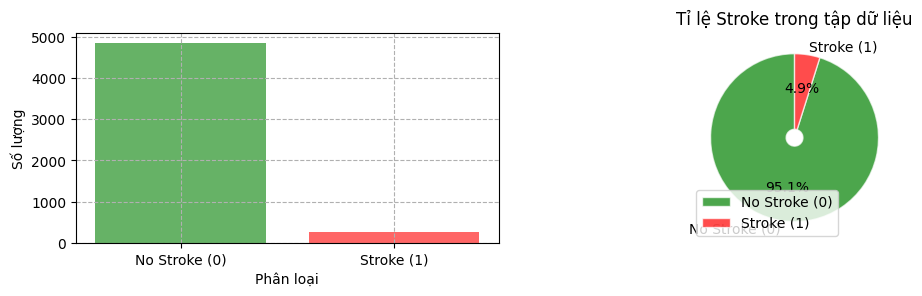

In [16]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)

plt.bar(stroke.index,stroke.values,
        alpha = 0.6,
       color=["green","red"])
plt.xticks(stroke.index, ["No Stroke (0)", "Stroke (1)"])
plt.xlabel("Phân loại")
plt.ylabel("Số lượng")
plt.grid(ls="--")

plt.subplot(2,2,2)
plt.pie(stroke ,
       labels=["No Stroke (0)", "Stroke (1)"],
       autopct="%1.1f%%",
       colors=["green", "red"],
       startangle=90,
       wedgeprops=dict(width=0.9,edgecolor='w', alpha=0.7))
plt.title("Tỉ lệ Stroke trong tập dữ liệu")
plt.legend()
plt.show()

**Ta thấy với tập dữ liệu này. Tỉ lệ của lớp 0 chiếm 95.1% còn tỉ lệ lớp 1 chiếm 4.9% -->Tập dữ liệu bị mất cân bằng trung bình**

#### **Các công việc cần làm**
1. Xử lý dữ liệu ngoại lai thuộc tính gender
2. Xử lý dữ liệu missing thuộc tính bmi
3. Chuẩn hóa các thuộc tính
4. Xử lý mất cân bằng dữ liệu

### **2. Xử lý dữ liệu**

#### **2.1 Xử lý dữ liệu ngoại lai thuộc tính gender**

In [17]:
data_stroke["gender"].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [18]:
data_stroke.loc[data_stroke["gender"] == "Other", :]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [19]:
#Giá trị Female xuất hiện nhiều nhất --> Thay Other bằng Female
data_stroke["gender"] = data_stroke["gender"].replace("Other" ,"Female")

In [20]:
data_stroke.loc[data_stroke["gender"] =="Other",:]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke


#### **2.2 Xử lý dữ liệu missing bmi**

In [21]:
#Dùng phương pháp nội suy tuyến tính
data_stroke["bmi"]=data_stroke["bmi"].interpolate(method="linear")

In [22]:
data_stroke.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [23]:
#Thuộc tính gender : Female -> 0 , Male --> 1
data_stroke["gender"] = data_stroke["gender"].map({"Female":0, "Male":1})

In [24]:
#Thuộc tính ever_married: Yes --> 1 , No --> 0
data_stroke["ever_married"] = data_stroke["ever_married"].map({"Yes":1,"No":0})

In [25]:
#Thuộc tính work_type: Private --> 0 , Self-employed --> 1 , children --> 2 , Govt_job --> 3 , Never_worked --> 4
data_stroke["work_type"] = data_stroke["work_type"].map({"Private" : 0 ,"Self-employed" : 1 , "children" : 2 , "Govt_job" :3 , "Never_worked" :4})

In [26]:
#Thuộc tính smoking_status: never smoked --> 0 , Unknown --> 1 , formerly smoked -->2  , smokes -->3
data_stroke["smoking_status"]= data_stroke["smoking_status"].map({"never smoked" : 0 , "Unknown": 1 , "formerly smoked":2  , "smokes":3})

In [27]:
#Thuộc tính residence_type: Urban --> 0 , Rural --> 1
data_stroke["residence_type"] = data_stroke["residence_type"].map({"Urban":0, "Rural":1})

In [28]:
data_stroke.sample(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
1273,65339,0,46.0,0,0,1,0,0,127.75,30.5,0,0
4676,56185,0,28.0,0,0,0,0,0,73.20,26.5,3,0
3003,36803,0,35.0,0,0,0,0,1,74.53,24.6,0,0
1508,17827,1,51.0,0,0,1,0,1,111.13,32.7,2,0
2052,32320,0,35.0,0,0,1,1,0,114.45,25.2,3,0


In [29]:
X = data_stroke.drop(['id','stroke'], axis=1)
X

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,0,0,228.69,36.60,2
1,0,61.0,0,0,1,1,1,202.21,34.55,0
2,1,80.0,0,1,1,0,1,105.92,32.50,0
3,0,49.0,0,0,1,0,0,171.23,34.40,3
4,0,79.0,1,0,1,1,1,174.12,24.00,0
...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,0,0,83.75,29.30,0
5106,0,81.0,0,0,1,1,0,125.20,40.00,0
5107,0,35.0,0,0,1,1,1,82.99,30.60,0
5108,1,51.0,0,0,1,0,1,166.29,25.60,2


In [30]:
y = data_stroke['stroke']
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 train_size=0.8,
                                                 shuffle=True,
                                                random_state=42)

print("Tổng số mẫu trong tập dữ liệu: ",len(y))
print("Tổng số mẫu trên tập Train: ",len(y_train))
print("Tổng số mẫu trên tập Test: ",len(y_test))

Tổng số mẫu trong tập dữ liệu:  5110
Tổng số mẫu trên tập Train:  4088
Tổng số mẫu trên tập Test:  1022


In [32]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [43]:
over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.8)
steps = [('over', over), 
         ('under', under)]
pipeline = Pipeline(steps=steps)
X4,y4 = pipeline.fit_resample(X ,y)


counter4 = Counter(y4)
print(counter4)

Counter({0: 3037, 1: 2430})


In [44]:
data_stroke_ok = pd.concat([pd.DataFrame(X4, columns=X.columns),
                            pd.Series(y4, name='stroke')], axis=1)

In [45]:
data_stroke_ok['age'] = data_stroke_ok['age'].round(0).astype(int)

In [46]:
data_stroke_ok["avg_glucose_level"] = data_stroke_ok["avg_glucose_level"].round(1).astype(float)

In [47]:
data_stroke_ok["bmi"] = data_stroke_ok["bmi"].round(1).astype(float)

In [ ]:
data_stroke_ok.to_csv("C:/Users/Admin/Desktop/DA1/data/DataStroke_OK.csv", index=False)

In [34]:
stroke_ok = pd.concat([pd.DataFrame(X5, columns=X.columns),
                            pd.Series(y5, name='stroke')], axis=1)

In [35]:
testok = pd.concat([pd.DataFrame(X_test, columns=X.columns),
                            pd.Series(y_test, name='stroke')], axis=1)
testok

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
4688,1,31.00,0,0,0,1,1,64.85,23.0,1,0
4478,1,40.00,0,0,1,1,1,65.29,28.3,0,0
3849,0,8.00,0,0,0,2,0,74.42,22.5,1,0
4355,0,79.00,1,0,1,1,1,76.64,19.5,0,0
3826,0,75.00,0,0,1,3,1,94.77,27.2,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3605,1,1.88,0,0,0,2,1,143.97,48.2,1,0
4934,1,1.32,0,0,0,2,1,107.02,31.4,1,0
4835,1,49.00,1,0,1,1,1,119.30,30.4,2,0
4105,0,56.00,0,0,0,1,0,128.63,24.9,3,0


In [36]:
stroke_ok_full = pd.concat([stroke_ok, testok], axis=0).reset_index(drop=True)
stroke_ok_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5409 entries, 0 to 5408
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5409 non-null   int64  
 1   age                5409 non-null   float64
 2   hypertension       5409 non-null   int64  
 3   heart_disease      5409 non-null   int64  
 4   ever_married       5409 non-null   int64  
 5   work_type          5409 non-null   int64  
 6   residence_type     5409 non-null   int64  
 7   avg_glucose_level  5409 non-null   float64
 8   bmi                5409 non-null   float64
 9   smoking_status     5409 non-null   int64  
 10  stroke             5409 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 465.0 KB


In [37]:
stroke_ok_full['age'] = stroke_ok_full['age'].round(0).astype(int)

In [38]:
stroke_ok_full['avg_glucose_level'] = stroke_ok_full['avg_glucose_level'].round(1).astype(float)

In [39]:
stroke_ok_full['bmi'] = stroke_ok_full['bmi'].round(1).astype(float)

In [40]:
stroke_ok_full.to_csv("C:/Users/Admin/Desktop/DA1/data/stroke_ok_full.csv", index=False)

In [37]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Khởi tạo mô hình XGBoost
xgb_model = XGBClassifier(
    n_estimators=500,       # số lượng cây
    max_depth=15,            # độ sâu mỗi cây
    learning_rate=0.05,      # tốc độ học (bước cập nhật)
    subsample=1,          # tỷ lệ mẫu dùng mỗi cây (giúp tránh overfitting)
    colsample_bytree=0.8,   # tỷ lệ đặc trưng dùng mỗi cây
    random_state=42,
    eval_metric='logloss',  # chỉ số đánh giá nội bộ
    use_label_encoder=False
)

# Huấn luyện mô hình (chỉ trên tập train đã cân bằng)
xgb_model.fit(X5, y5)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, ...)

In [38]:
xgb_model.score(X5,y5)

1.0

In [ ]:
y_pre= xgb_model.predict(X_test)


array([0, 0, 0, ..., 0, 0, 0], shape=(1022,))

In [41]:
print("Độ chính xác trên tập Test:", accuracy_score(y_test, y_pre))
print("\n📘 Classification Report:\n", classification_report(y_test, y_pre))
print("\n🧩 Confusion Matrix:\n", confusion_matrix(y_test, y_pre))

Độ chính xác trên tập Test: 0.8992172211350293

📘 Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95       960
           1       0.21      0.24      0.23        62

    accuracy                           0.90      1022
   macro avg       0.58      0.59      0.59      1022
weighted avg       0.91      0.90      0.90      1022


🧩 Confusion Matrix:
 [[904  56]
 [ 47  15]]


In [36]:
stroke_ok.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4387 entries, 3256 to 5850
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4387 non-null   int64  
 1   age                4387 non-null   float64
 2   hypertension       4387 non-null   int64  
 3   heart_disease      4387 non-null   int64  
 4   ever_married       4387 non-null   int64  
 5   work_type          4387 non-null   int64  
 6   residence_type     4387 non-null   int64  
 7   avg_glucose_level  4387 non-null   float64
 8   bmi                4387 non-null   float64
 9   smoking_status     4387 non-null   int64  
 10  stroke             4387 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 411.3 KB


### Tất cả tập dl

In [76]:
over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.8)
steps = [('over', over), 
         ('under', under)]
pipeline = Pipeline(steps=steps)
X4,y4 = pipeline.fit_resample(X,y)


counter4 = Counter(y4)
print(counter4)

Counter({0: 3037, 1: 2430})


In [ ]:
data_stroke_ok1 = pd.concat([pd.DataFrame(X4, columns=X.columns),
                            pd.Series(y4, name='stroke')], axis=1)

In [ ]:
data_stroke_ok1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5467 entries, 4487 to 7290
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5467 non-null   int64  
 1   age                5467 non-null   float64
 2   hypertension       5467 non-null   int64  
 3   heart_disease      5467 non-null   int64  
 4   ever_married       5467 non-null   int64  
 5   work_type          5467 non-null   int64  
 6   residence_type     5467 non-null   int64  
 7   avg_glucose_level  5467 non-null   float64
 8   bmi                5467 non-null   float64
 9   smoking_status     5467 non-null   int64  
 10  stroke             5467 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 512.5 KB


In [ ]:
data_stroke_ok1.sample(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
6477,0,79.956430,0,0,1,0,0,105.937864,32.510892,0,1
6503,1,58.131983,0,0,1,0,1,91.299107,40.888339,1,1
1423,1,56.000000,1,0,1,0,0,102.370000,35.600000,0,0
5409,1,58.085956,0,0,1,0,1,240.383190,31.331235,2,1
320,1,22.000000,0,0,0,0,1,103.560000,25.100000,1,0


In [ ]:
data_stroke_ok1['age'] = data_stroke_ok1['age'].round(0).astype(int)

In [ ]:
data_stroke_ok1['avg_glucose_level'] = data_stroke_ok1['avg_glucose_level'].round(1).astype(float)

In [ ]:
data_stroke_ok1['bmi'] = data_stroke_ok1['bmi'].round(1).astype(float)

In [ ]:
data_stroke_ok1.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
4487,0,17,0,0,0,0,0,81.5,19.5,2,0
3429,0,62,0,0,1,0,1,98.0,27.9,0,0
1863,0,12,0,0,0,2,1,86.0,35.7,1,0
2302,1,37,0,0,1,1,0,87.2,30.4,2,0
2038,1,60,0,0,1,0,1,68.2,32.2,1,0


In [ ]:
data_stroke_ok1.to_csv("C:/Users/Admin/Desktop/DA1/data/DataStroke_OK.csv")